# Normalize Data

#### TOC
- [Provide Use Case Parameters](#Provide-Use-Case-Parameters)
- [Read DataFrame from the CSV file](#Read-DataFrame-from-the-CSV-file)
- [Function to normalize the data](#Function-to-normalize-the-data)
- [Write DataFrame to the CSV file](#Write-DataFrame-to-the-CSV-file)

# Provide Use Case Parameters

In [93]:
using DataFrames, CSV, Dates, Plots

file_name = "market_indicators.csv"
original_column   = 9  # original data
normalized_column = 10 # to be populated with normalized values

10

# Read DataFrame from the CSV file

In [94]:
df = CSV.read(file_name)

# Show the values of the cololumn with the original data
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 9. S&P500 m/m │ 10. S&P500 m/m norm │
│      │ Float64       │ Float64?            │
├──────┼───────────────┼─────────────────────┤
│ 1    │ 0.0           │ 0.0                 │
│ 2    │ 0.0           │ missing             │
│ 3    │ 0.0           │ missing             │
│ 4    │ 0.0           │ missing             │
│ 5    │ 0.0           │ missing             │
│ 6    │ 0.0           │ missing             │
│ 7    │ 0.0           │ missing             │
│ 8    │ 0.0           │ missing             │
│ 9    │ 0.0           │ missing             │
│ 10   │ 0.0           │ missing             │
⋮
│ 1613 │ 0.0204        │ missing             │
│ 1614 │ 0.0204        │ missing             │
│ 1615 │ 0.034         │ missing             │
│ 1616 │ 0.034         │ missing             │
│ 1617 │ 0.0286        │ missing             │
│ 1618 │ 0.0286        │ missing             │
│ 1619 │ -0.0016       │ missing             │
│ 1620 │ -0.0016       │ missing         

# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

In [95]:
function normalize(df, original_column, normalized_column)
    original = df[:, original_column]
    items = length(original) 
    
    min = minimum(original)
    max = maximum(original)   

    for i in 1:items
        value = (original[i] - min) / (max - min) # normalization formula 0.0 to 1.0
        #value = value * 100                    # 0.0 to 100
        value = value * 200                    # 0.0 to 200
        value = value - 100                    # -100 to 100
        value = round(value, digits=2)         # 0.00 
        df[i, normalized_column] = value
    end
    return df[:, normalized_column]
end

data_normalized = normalize(df, original_column, normalized_column)

1623-element SentinelArrays.SentinelArray{Float64,1,Float64,Missing,Array{Float64,1}}:
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
  14.35
   ⋮
  23.38
  25.07
  25.07
  32.21
  32.21
  29.37
  29.37
  13.5
  13.5
 -29.85
 -29.85
 -29.85

# Get only years

In [96]:
dates = df[:,2]
dates[1]

1948-03-31

In [97]:
columns = length(dates)
periods = Array{String, 1}(undef, columns)

for i in 1:columns
    periods[i] = string( Dates.month(dates[i]), "/", Dates.year(dates[i])   )
end
periods

1623-element Array{String,1}:
 "3/1948"
 "4/1948"
 "5/1948"
 "6/1948"
 "7/1948"
 "8/1948"
 "9/1948"
 "10/1948"
 "11/1948"
 "12/1948"
 "1/1949"
 "2/1949"
 "3/1949"
 ⋮
 "9/2019"
 "10/2019"
 "10/2019"
 "11/2019"
 "11/2019"
 "12/2019"
 "12/2019"
 "1/2020"
 "1/2020"
 "2/2020"
 "2/2020"
 "3/2020"

# Draw plots

- https://docs.juliaplots.org/latest/layouts/

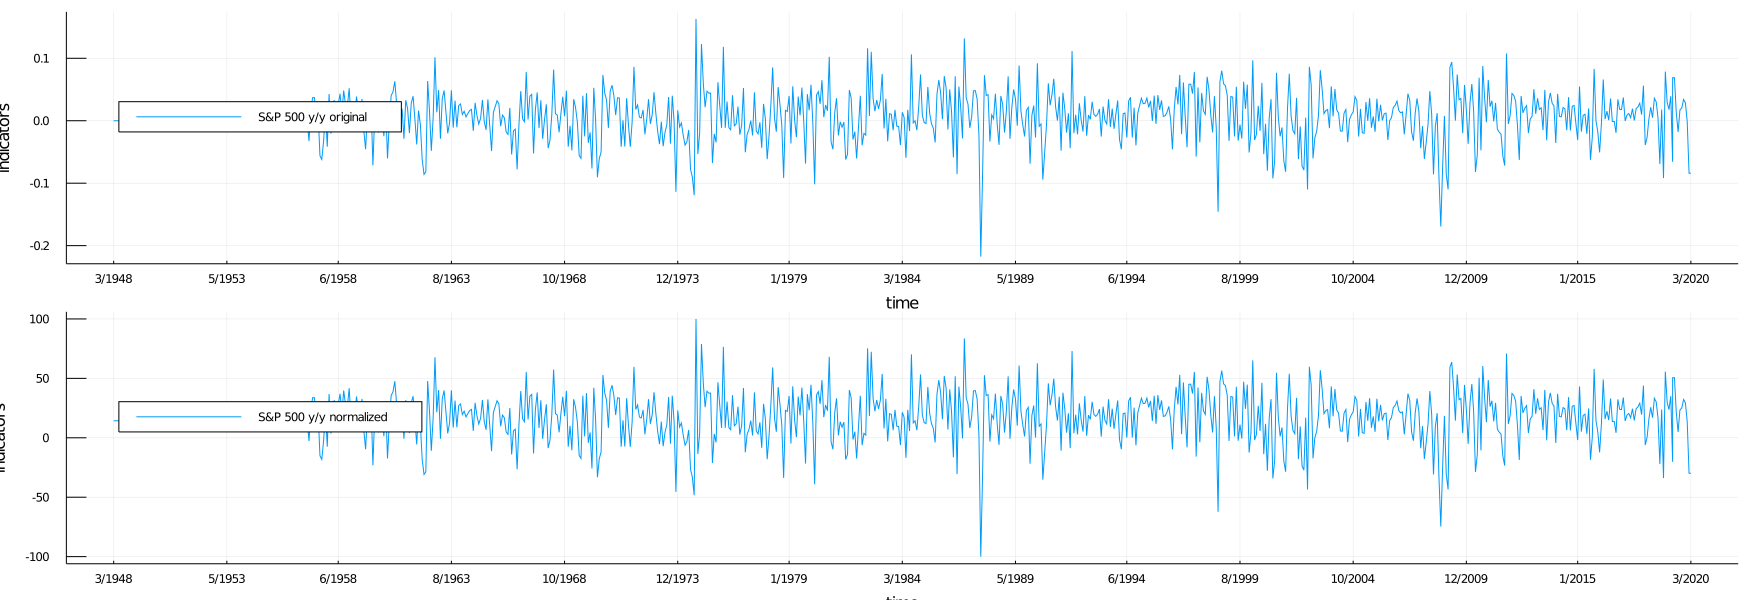

In [98]:
gr()
plot(periods, 
    [df[:,original_column]  df[:,normalized_column]  ], 
    label    = ["S&P 500 y/y original" "S&P 500 y/y normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (2, 1)
    )

# Write DataFrame to the CSV file

In [99]:
CSV.write(file_name, df, delim=',', header=true)

"market_indicators.csv"

In [100]:
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 9. S&P500 m/m │ 10. S&P500 m/m norm │
│      │ Float64       │ Float64?            │
├──────┼───────────────┼─────────────────────┤
│ 1    │ 0.0           │ 14.35               │
│ 2    │ 0.0           │ 14.35               │
│ 3    │ 0.0           │ 14.35               │
│ 4    │ 0.0           │ 14.35               │
│ 5    │ 0.0           │ 14.35               │
│ 6    │ 0.0           │ 14.35               │
│ 7    │ 0.0           │ 14.35               │
│ 8    │ 0.0           │ 14.35               │
│ 9    │ 0.0           │ 14.35               │
│ 10   │ 0.0           │ 14.35               │
⋮
│ 1613 │ 0.0204        │ 25.07               │
│ 1614 │ 0.0204        │ 25.07               │
│ 1615 │ 0.034         │ 32.21               │
│ 1616 │ 0.034         │ 32.21               │
│ 1617 │ 0.0286        │ 29.37               │
│ 1618 │ 0.0286        │ 29.37               │
│ 1619 │ -0.0016       │ 13.5                │
│ 1620 │ -0.0016       │ 13.5            